In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [13]:
# EDA for Transactions Dataset
print("\n--- Transactions Dataset EDA ---")
print("\n1. Basic Overview")
print(f"Shape of the dataset (rows, columns): {transactions.shape}")
print(f"Column names: {transactions.columns.tolist()}")
print("\nData Types of Columns:\n", transactions.dtypes)
print("\nFirst 5 rows of the dataset:")
print(transactions.head())


--- Transactions Dataset EDA ---

1. Basic Overview
Shape of the dataset (rows, columns): (1000, 7)
Column names: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']

Data Types of Columns:
 TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

First 5 rows of the dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3    


2. Checking for Missing Values
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


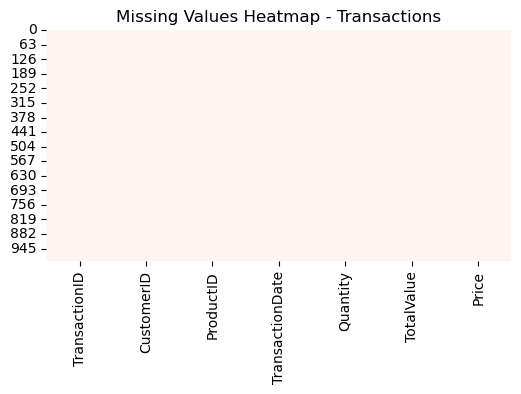

In [16]:
# Check for missing values
print(transactions.isnull().sum())
plt.figure(figsize=(6, 3))
sns.heatmap(transactions.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap - Transactions")
plt.show()

In [17]:
# Describe the data statistically
print(transactions.describe(include='all'))



3. Statistical Summary
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue       P

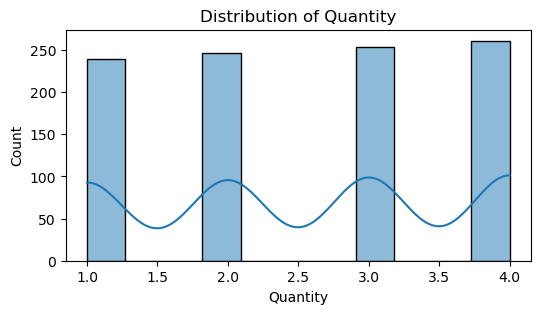

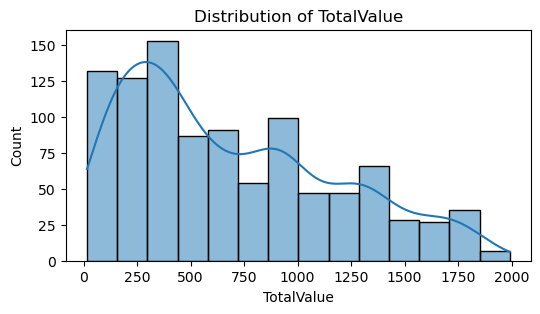

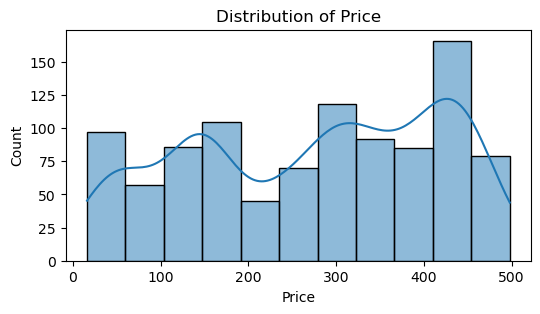

In [20]:
# Numeric columns
num = transactions.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(transactions[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

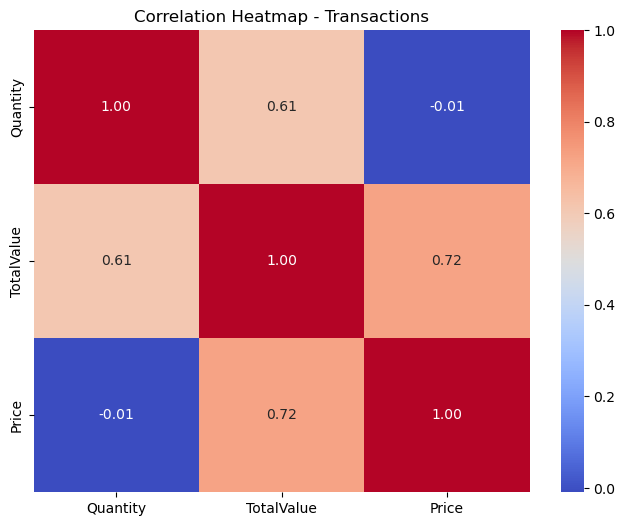

In [43]:
num = transactions.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Transactions")
plt.show()

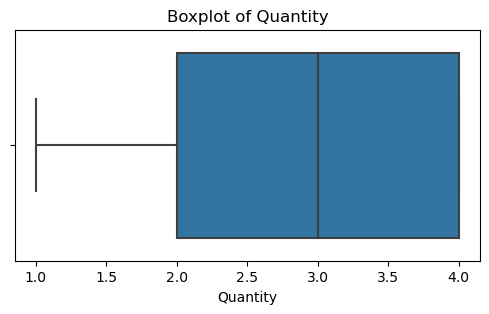

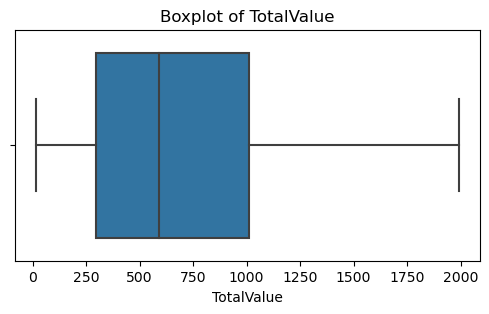

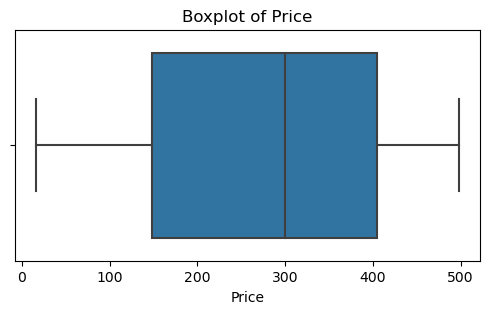

In [45]:
for col in num.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=transactions[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

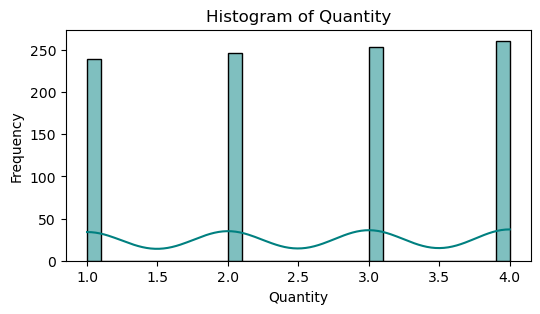

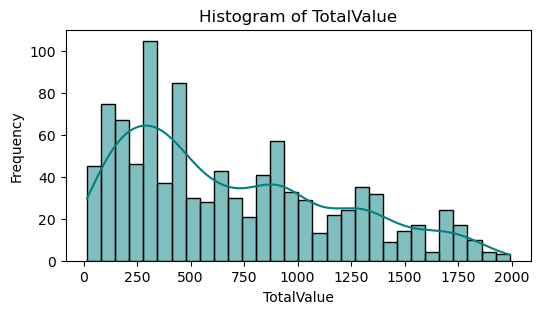

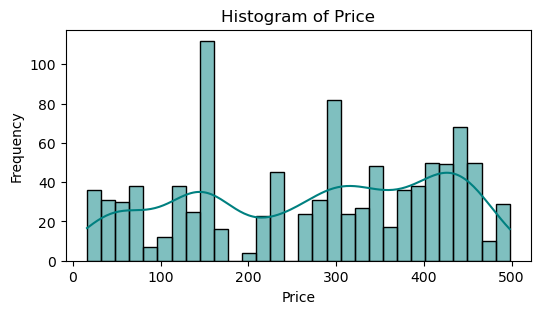

In [54]:
for col in num.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(transactions[col], kde=True, bins=30, color='teal')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


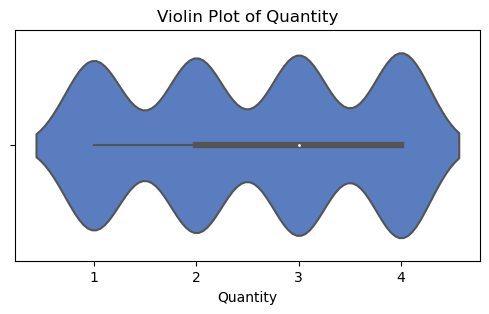

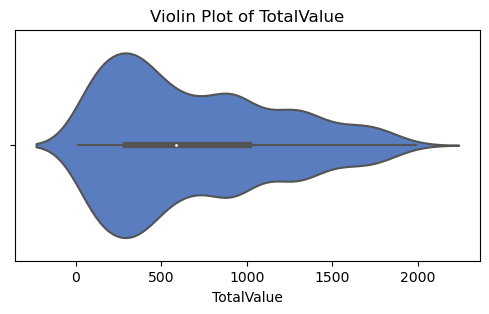

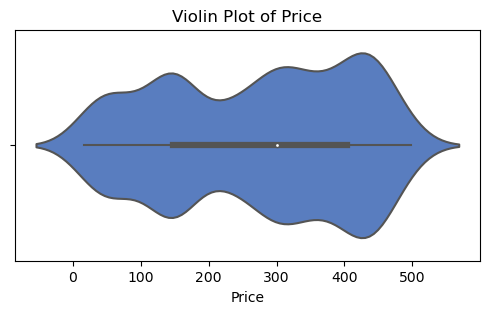

In [55]:
for col in num:
    plt.figure(figsize=(6, 3))
    sns.violinplot(data=transactions, x=col, palette="muted")
    plt.title(f"Violin Plot of {col}")
    plt.show()

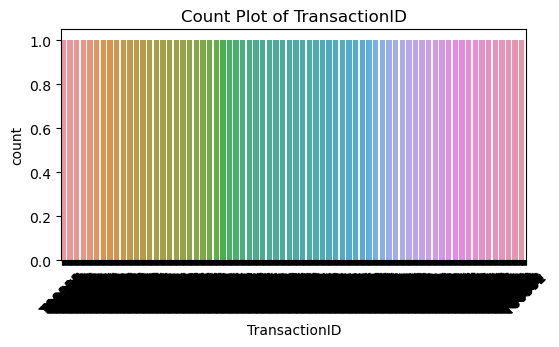

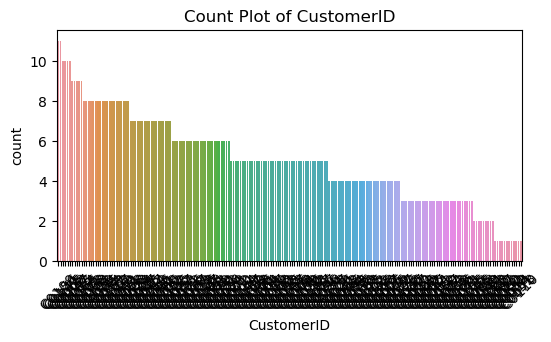

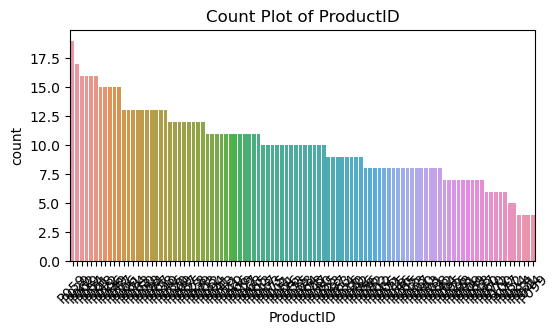

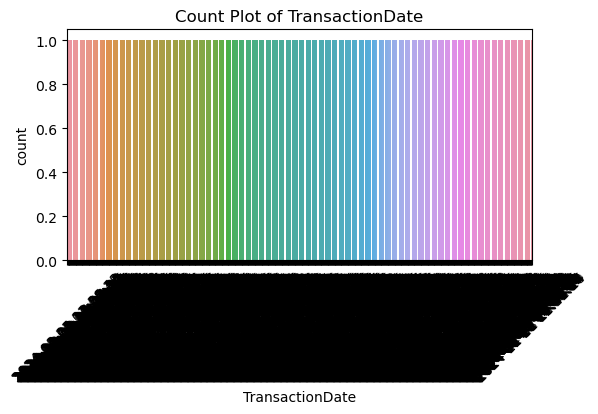

In [21]:
# Categorical columns
Cat = transactions.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=transactions, x=col, order=transactions[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [56]:
print("\n--- Products Dataset EDA ---")
print("\n1. Basic Overview")
print(f"Shape of the dataset (rows, columns): {products.shape}")
print(f"Column names: {products.columns.tolist()}")
print("\nData Types of Columns:\n", products.dtypes)
print("\nFirst 5 rows of the dataset:")
print(products.head())


--- Products Dataset EDA ---

1. Basic Overview
Shape of the dataset (rows, columns): (100, 4)
Column names: ['ProductID', 'ProductName', 'Category', 'Price']

Data Types of Columns:
 ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

First 5 rows of the dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


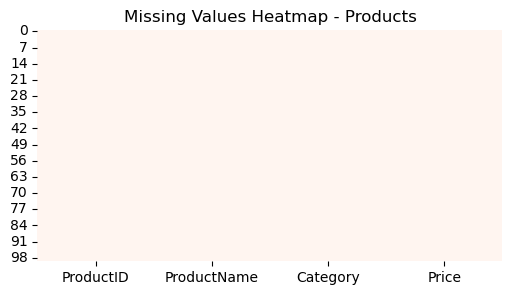

In [58]:
# Missing Values Heatmap
print(products.isnull().sum())
plt.figure(figsize=(6, 3))
sns.heatmap(products.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap - Products")
plt.show()

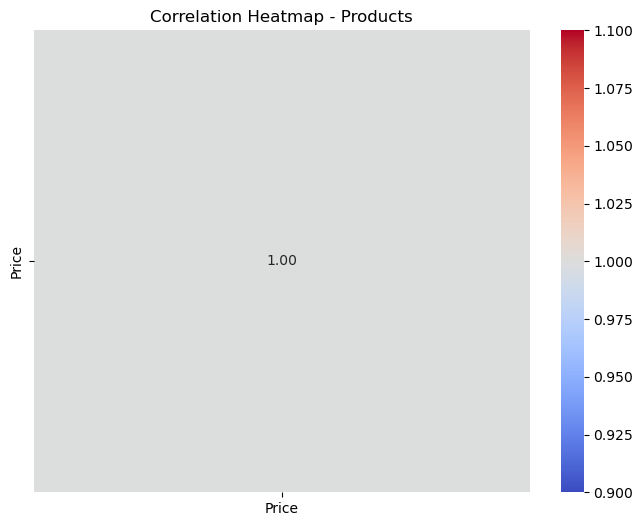

In [60]:
# Correlation Heatmap (for numeric data)
num = products.select_dtypes(include=['int64', 'float64'])
if not num.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap - Products")
    plt.show()

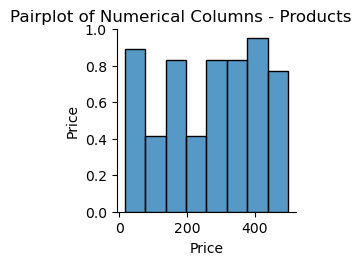

In [61]:
# Pairplot for Numerical Columns
if not num.empty:
    sns.pairplot(numeric_cols)
    plt.suptitle("Pairplot of Numerical Columns - Products", y=1.02)
    plt.show()

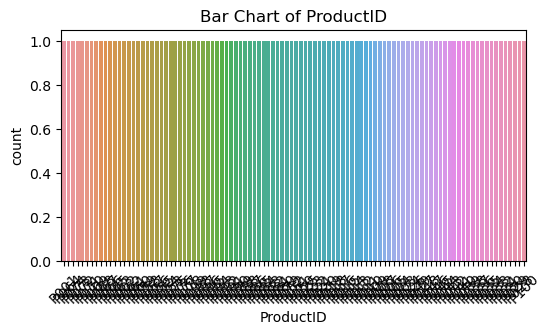

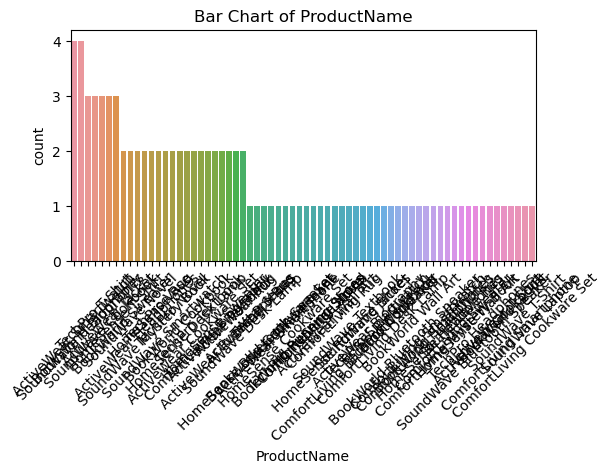

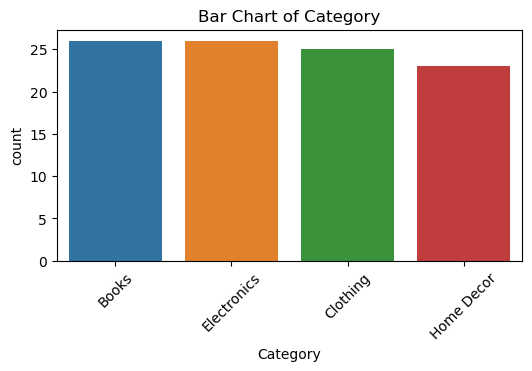

In [63]:
# Bar Chart for Categorical Data
cat = products.select_dtypes(include=['object']).columns
if not cat.empty:
    for col in cat:
        plt.figure(figsize=(6, 3))
        sns.countplot(data=products, x=col, order=products[col].value_counts().index)
        plt.title(f"Bar Chart of {col}")
        plt.xticks(rotation=45)
        plt.show()

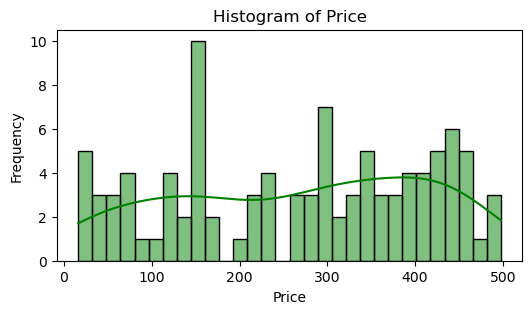

In [69]:
# Histogram for Numerical Data
if not numeric_cols.empty:
    for col in numeric_cols.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(products[col], kde=True, bins=30, color='green')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


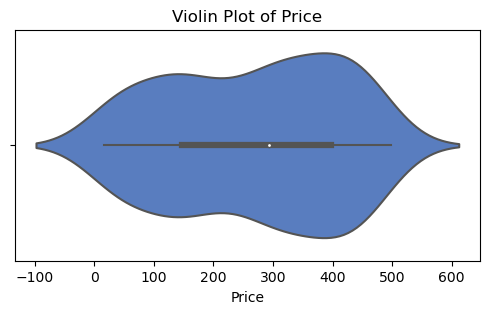

In [71]:
# Violin Plot (distribution with density)
if not numeric_cols.empty:
    for col in numeric_cols.columns:
        plt.figure(figsize=(6, 3))
        sns.violinplot(data=products, x=col, palette="muted")
        plt.title(f"Violin Plot of {col}")
        plt.show()

In [72]:
# Basic Overview
print("\n--- Customers Dataset EDA ---")
print("\n1. Basic Overview")
print(f"Shape of the dataset (rows, columns): {customers.shape}")
print(f"Column names: {customers.columns.tolist()}")
print("\nData Types of Columns:\n", customers.dtypes)
print("\nFirst 5 rows of the dataset:")
print(customers.head())


--- Customers Dataset EDA ---

1. Basic Overview
Shape of the dataset (rows, columns): (200, 4)
Column names: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']

Data Types of Columns:
 CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

First 5 rows of the dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


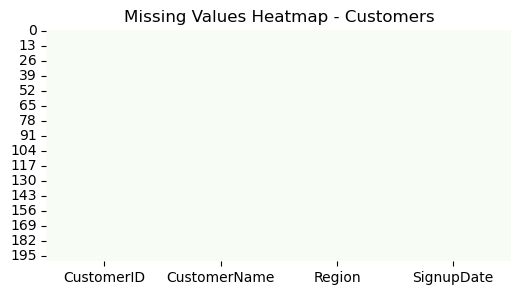

In [74]:
# Missing Values Heatmap
print(customers.isnull().sum())
plt.figure(figsize=(6, 3))
sns.heatmap(customers.isnull(), cbar=False, cmap="Greens")
plt.title("Missing Values Heatmap - Customers")
plt.show()

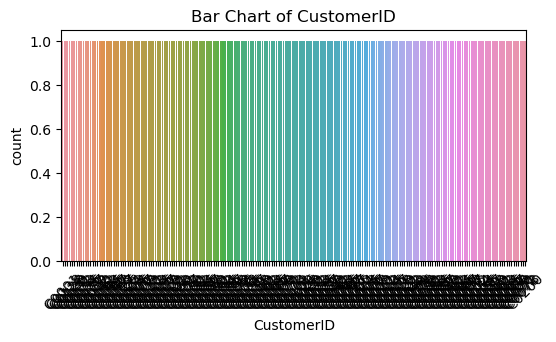

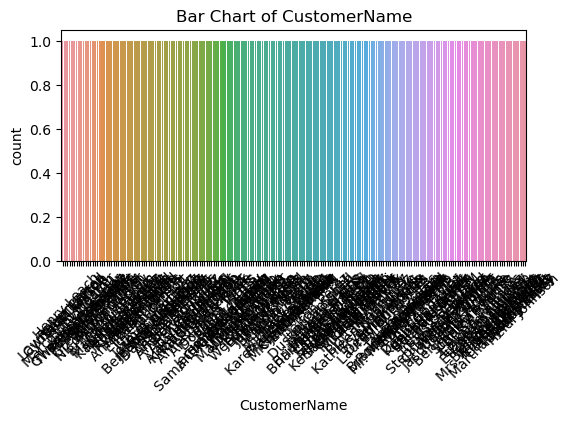

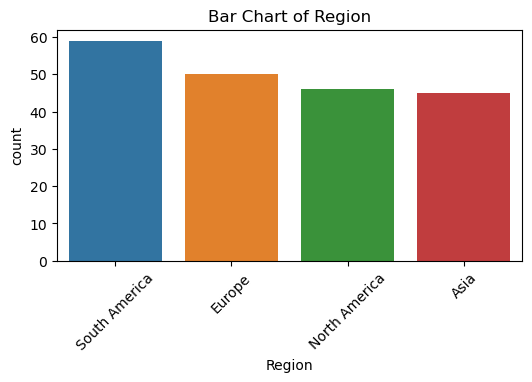

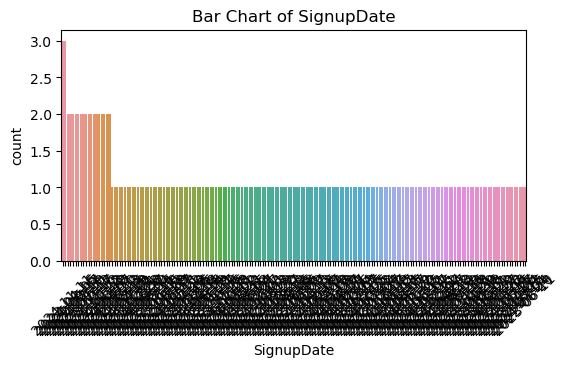

In [79]:
# Bar Chart for Categorical Data
cat = customers.select_dtypes(include=['object']).columns
if not cat.empty:
    for col in cat:
        plt.figure(figsize=(6, 3))
        sns.countplot(data=customers, x=col, order=customers[col].value_counts().index)
        plt.title(f"Bar Chart of {col}")
        plt.xticks(rotation=45)
        plt.show()